In [1]:
import numpy

# MIDI Listen

In [2]:
#!/usr/bin/env python
#
# midiin_poll.py
#
"""Show how to receive MIDI input by polling an input port."""

from __future__ import print_function

import logging
import sys
import time

from rtmidi.midiutil import open_midiinput


log = logging.getLogger('midiin_poll')
logging.basicConfig(level=logging.DEBUG)

# Prompts user for MIDI input port, unless a valid port number or name
# is given as the first argument on the command line.
# API backend defaults to ALSA on Linux.
port = sys.argv[1] if len(sys.argv) > 1 else None

try:
    midiin, port_name = open_midiinput(port)
except (EOFError, KeyboardInterrupt):
    sys.exit()

print("Entering main loop. Press Control-C to exit.")
try:
    timer = time.time()
    while True:
        msg = midiin.get_message()

        if msg:
            message, deltatime = msg
            timer += deltatime
            print("[%s] @%0.6f %r" % (port_name, timer, message))

        time.sleep(0.01)
except KeyboardInterrupt:
    print('')
finally:
    print("Exit.")
    midiin.close_port()
    del midiin

DEBUG:rtmidi.midiutil:Creating MidiIn object.


Available MIDI ports:

[0] Piaggero
[1] GarageBand Virtual Out



INFO:rtmidi.midiutil:Opening MIDI input port #0 (Piaggero).


Entering main loop. Press Control-C to exit.
[Piaggero] @1722807266.833532 [144, 39, 81]
[Piaggero] @1722970591.308028 [144, 42, 94]
[Piaggero] @1722970591.310037 [144, 44, 90]
[Piaggero] @1722970591.391001 [144, 45, 35]
[Piaggero] @1722970591.491073 [144, 42, 0]
[Piaggero] @1722970591.492011 [144, 44, 0]
[Piaggero] @1722970591.492949 [144, 39, 0]
[Piaggero] @1722970591.534016 [144, 45, 0]

Exit.


# MIDI Write

In [38]:
import time
import rtmidi

midiout = rtmidi.MidiOut()
available_ports = midiout.get_ports()

if available_ports:
    midiout.open_port(0)
else:
    midiout.open_virtual_port("My virtual output")

with midiout:
    note_on = [0x90, 60, 127] # channel 1, middle C, velocity 112
    note_off = [0x80, 60, 0]
    midiout.send_message(note_on)
    time.sleep(0.5)
    # midiout.send_message(note_off)
    time.sleep(0.1)

del midiout

# MIC Listen

In [18]:
import sounddevice as sd
import numpy as np

# Constants
DURATION = 1
# Duration to capture in seconds
RATE = 44100  # Sampling rate (samples per second)

audio_data = sd.rec(int(DURATION * RATE), samplerate=RATE, channels=1, dtype='int16')
sd.wait()  # Wait until the recording is finished
data = audio_data.flatten()

import numpy as np
from scipy.signal import find_peaks

def freq_to_midi(frequency):
    if frequency <= 0:
        return None  # Avoid log of zero error
    return int(69 + 12 * np.log2(frequency / 440.0))  # Standard formula for MIDI note calculation



ModuleNotFoundError: No module named 'scipy'

In [2]:
import sounddevice as sd
import numpy as np

# Constants
DURATION = 1
# Duration to capture in seconds
RATE = 44100  # Sampling rate (samples per second)

audio_data = sd.rec(int(DURATION * RATE), samplerate=RATE, channels=1, dtype='int16')
sd.wait()  # Wait until the recording is finished
data = audio_data.flatten()

import numpy as np
from scipy.signal import find_peaks

def freq_to_midi(frequency):
    if frequency <= 0:
        return None  # Avoid log of zero error
    return int(69 + 12 * np.log2(frequency / 440.0))  # Standard formula for MIDI note calculation

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import find_peaks

# Constants
DURATION = 1  # Duration to capture in seconds
RATE = 44100  # Sampling rate (samples per second)

# Record audio
audio_data = sd.rec(int(DURATION * RATE), samplerate=RATE, channels=1, dtype='int16')
sd.wait()  # Wait until the recording is finished
data = audio_data.flatten()

# FFT analysis
fft_data = np.fft.fft(data)
freqs = np.fft.fftfreq(len(fft_data), 1 / RATE)

# Plot frequency spectrum
plt.plot(freqs[:len(freqs)//2], np.abs(fft_data)[:len(fft_data)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.show()

# Detect peaks
peaks, _ = find_peaks(np.abs(fft_data)[:len(fft_data)//2], height=100)  # Adjust the height parameter as needed
peak_freqs = freqs[peaks]

# Convert peak frequencies to MIDI notes
midi_notes = [freq_to_midi(freq) for freq in peak_freqs if freq > 0]

print("Detected MIDI Notes:", midi_notes)


ModuleNotFoundError: No module named 'scipy'

In [21]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 54.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


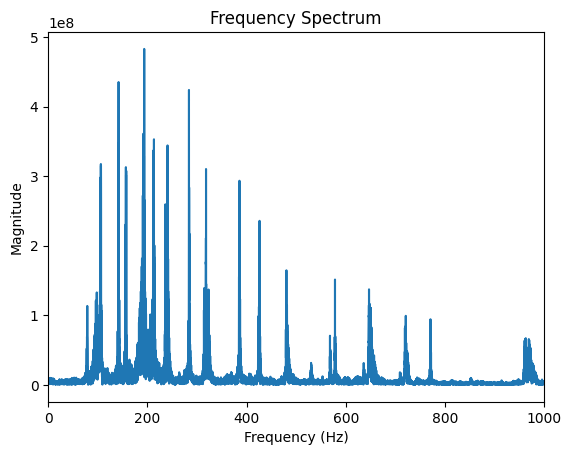

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import sounddevice as sd

# Constants
DURATION = 10
# Duration to capture in seconds
RATE = 44100  # Sampling rate (samples per second)

audio_data = sd.rec(int(DURATION * RATE), samplerate=RATE, channels=1, dtype='int16')
sd.wait()  # Wait until the recording is finished
data = audio_data.flatten()

sd.wait()  # Wait until the recording is finished
fft_data = np.fft.fft(data)
freqs = np.fft.fftfreq(len(fft_data), 1 / RATE)
plt.plot(freqs[:len(freqs)//2], np.abs(fft_data)[:len(fft_data)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 1000)
plt.title('Frequency Spectrum')
plt.show()

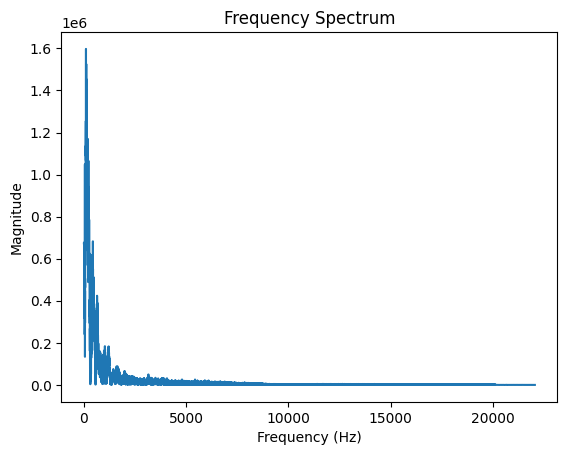

In [22]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

# Constants
DURATION = 1  # Duration to capture in seconds
RATE = 44100  # Sampling rate (samples per second)

# Set the device to MacBook Pro Microphone
sd.default.device = 0  # Device index for MacBook Pro Microphone

# Record audio
audio_data = sd.rec(int(DURATION * RATE), samplerate=RATE, channels=1, dtype='int16')
sd.wait()  # Wait until the recording is finished
data = audio_data.flatten()

# FFT analysis
fft_data = np.fft.fft(data)
freqs = np.fft.fftfreq(len(fft_data), 1 / RATE)

# Plot frequency spectrum
plt.plot(freqs[:len(freqs)//2], np.abs(fft_data)[:len(freqs)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.show()


In [210]:
!pip install imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftfreq
# 
# import sounddevice as sd
# import numpy as np
# import matplotlib.pyplot as plt
# import datetime
# from dataclasses import dataclass
# 
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftfreq
# 
# import sounddevice as sd
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Constants
# DURATION = 10  # Duration to capture in seconds
# RATE = 44100  # Sampling rate (samples per second)
# 
# # Set the device to MacBook Pro Microphone
# sd.default.device = 0  # Device index for MacBook Pro Microphone
# 
# # Record audio
# audio_data = sd.rec(int(DURATION * RATE), samplerate=RATE, channels=1, dtype='int16')
# sd.wait()  # Wait until the recording is finished
# data = audio_data.flatten()
# 
# # Step 2: Apply FFT
# yf = fft(data)
# xf = fftfreq(int(RATE * DURATION), 1 / RATE)
# 
# # Find the dominant frequency
# idx = np.argmax(np.abs(yf))
# dominant_freq = abs(xf[idx])
# 
# # Step 3: Convert frequency to nearest MIDI note
# def freq_to_midi(frequency):
#     if frequency == 0: return None
#     return 69 + 12 * np.log2(frequency / 440.0)
# 
# midi_note = int(freq_to_midi(dominant_freq))
# velocity = 50  # Example velocity
# 
# # MIDI event: [status, note_number, velocity]
# # Status 144 means "Note On" for channel 1
# midi_event = [144, midi_note, velocity]
# 
# print("MIDI Event:", midi_event)
# 
# @dataclass
# class Mel:
#     fft_snip: np.array
#     fre_snip: np.array
#     
#     def midi_event(self):
#         idx = np.argmax(np.abs(self.fft_snip))
#         dominant_freq = abs(self.fre_snip[idx])
#         def freq_to_midi(frequency):
#             if frequency == 0: return None
#             return 69 + 12 * np.log2(frequency / 440.0)
#         midi_note = int(freq_to_midi(dominant_freq))
#         velocity = 50
#     
#     def plot(self):
#         plt.plot(self.fre_snip, np.abs(self.fft_snip))
#         plt.title("FFT of Audio Data")
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Amplitude")
#         plt.xlim(0, 25000)
#         plt.grid(True)
#         plt.show()
# 
# @dataclass
# class MIDIEvent:
#     status: int
#     note_number: int
#     velocity: int
#     
#     @staticmethod
#     def freq_to_midi(frequency):
#         if frequency == 0: return None
#         return 69 + 12 * np.log2(frequency / 440.0)
#     
#     @property
#     def max_velocity(self):
#         return 127
#     
#     @property
#     def min_velocity(self):
#         return 0
#     
#     def send(self):
#         with midiout:
#             midiout.send_message([self.status, self.note_number, self.velocity])
#             time.sleep(0.5)
#             midiout.send_message([self.status - 16, self.note_number, 0])
#             time.sleep(0.1)
#     
#     @classmethod
#     def from_freq(cls, frequency, velocity=50):
#         midi_note = int(cls.freq_to_midi(frequency))
#         return cls(status=144, note_number=midi_note, velocity=velocity)
#     
#     @classmethod
#     def from_mel(cls, mel: Mel, velocity=50):
#         idx = np.argmax(np.abs(mel.fft_snip))
#         dominant_freq = abs(mel.fre_snip[idx])
#         midi_note = int(cls.freq_to_midi(dominant_freq))
#         return cls(status=144, note_number=midi_note, velocity=velocity)
#     
# 
# @dataclass
# class Recording:
#     name: str
#     
#     # Default
#     rate: int = 44100
#     duration: int = 1
#     channels: int = 1
#     dtype: str = 'int16'
#     
#     # Private setters
#     __recorded_data: np.array = None
#     __fft_data: np.array = None
#     __freqs: np.array = None
#     __start: datetime = None
#     __end: datetime = None
# 
#     @property
#     def data(self):
#         return self.__recorded_data
#     
#     @property
#     def fft_data(self):
#         return self.__fft_data
#     
#     @property
#     def freqs(self):
#         return self.__freqs
#     
#     @property
#     def start(self):
#         return self.__start
#     
#     @property
#     def end(self):
#         return self.__end
# 
#     def compute_fft(self):
#         if self.data is None:
#             self.record()
#         try:
#             if self.__fft_data is None:
#                 self.__fft_data = fft(data)
#             else:
#                 print("FFT already exists.")
#         except Exception as e:
#             print(f"Error during building FFT: {e}")
#     
#     def compute_freq(self):
#         if self.fft_data is None:
#             self.compute_fft()
#         try:
#             if self.__freqs is None:
#                 self.__freqs = fftfreq(len(self.fft_data), 1 / self.rate)
#             else:
#                 print("Frequencies already exist.")
#         except Exception as e:
#             print(f"Error during building frequencies: {e}")
# 
#     def windows(self, data, window_size, speed=2):
#         start = 0
#         while start < len(data):
#             yield int(start), int(start + window_size)
#             start += (window_size / speed)
#             
#     def compute_mfcc(self):
#         if self.data is None:
#             self.record()
#         try:
#             mfccs = []
#             for (start, end) in self.windows(self.data, 22050):
#                 mfccs.append(fft(self.data[start:end]))
#             return mfccs
#         except Exception as e:
#             print(f"Error during building MFCC: {e}")
#     
#     def _tup_from_data(self, data):
#         f = fft(data)
#         return (f, fftfreq(len(f), 1 / self.rate))
#     
#     def compute_mel(self, window_size=22050, speed=2):
#         if self.data is None:
#             self.record()
#         try:
#             mel = []
#             start = 0
#             while start < len(self.data):
#                 end = int(start + window_size)
#                 if end >= len(self.data):
#                     break
#                 mel.append(self._tup_from_data(self.data[start:end]))
#                 start += int(window_size / speed)
#             return mel
#         except Exception as e:
#             print(f"Error during building Mel: {e}")
# 
#     def record(self):
#         if self.data is not None:
#             print("Audio recording already exists.")
#             return self.data
#         else:
#             self.__start = datetime.datetime.now()
#             self.__end = self.start + datetime.timedelta(seconds=self.duration)
#             try:
#                 data = sd.rec(int(self.duration * self.rate), samplerate=self.rate, channels=self.channels, dtype=self.dtype)
#                 self.__recorded_data = data.flatten()
#                 sd.wait()
#             except Exception as e:
#                 print(f"Error during recording: {e}")
#             return self.data
# 
#     @classmethod
#     def from_name(cls, name: str, **kwargs):
#         return cls(name=name, **kwargs)
# 
# 
# 
# class Mic2Midi:
#     def __init__(self, default_duration=1, rate=44100):
#         self.default_duration = default_duration
#         self.rate = rate
#         self.recordings = {}
# 
#     def record_audio(self, name: str = None, duration: int = None):
#         recording = Recording.from_name(name if name else f"recording_{len(self.recordings)}", rate=self.rate, duration=duration if duration else self.default_duration)
#         recording.record()
#         self.recordings.update({recording.name: recording})
#         return recording.data
#     
#     def compute_fft(self, name: str):
#         self.recordings[name].compute_fft()
#         return self.recordings[name].fft_data
#     
#     def compute_freq(self, name: str):
#         self.recordings[name].compute_freq()
#         return self.recordings[name].freqs
#     
#     def recording(self, name: str):
#         return self.recordings[name]
# 
#     def plot_freq(self, name: str):
#         yf = self.compute_fft(name)
#         xf = self.compute_freq(name)
# 
#         plt.plot(xf, np.abs(yf))
#         plt.title("FFT of Audio Data")
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Amplitude")
#         plt.xlim(0, 25000)
#         plt.grid(True)
#         plt.show()
# 
#         
# mic_fft = Mic2Midi()
# mic_fft.record_audio(name="test_1", duration=5)

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftfreq
# import sounddevice as sd
# import datetime
# from dataclasses import dataclass, field
# 
# # Helper function to convert frequency to MIDI note
# def freq_to_midi(frequency):
#     if frequency == 0:
#         return None
#     return 69 + 12 * np.log2(frequency / 440.0)
# 
# @dataclass
# class Mel:
#     fft_snip: np.ndarray
#     fre_snip: np.ndarray
# 
#     def plot(self):
#         plt.plot(self.fre_snip, np.abs(self.fft_snip))
#         plt.title("FFT of Audio Data")
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Amplitude")
#         plt.xlim(0, 25000)
#         plt.grid(True)
#         plt.show()
# 
# @dataclass
# class Recording:
#     name: str
#     rate: int = 44100
#     duration: int = 10
#     channels: int = 1
#     dtype: str = 'int16'
#     data: np.ndarray = field(default=None, repr=False)
#     fft_data: np.ndarray = field(default=None, repr=False)
#     freqs: np.ndarray = field(default=None, repr=False)
# 
#     def record(self):
#         """Record audio from the default microphone."""
#         self.data = sd.rec(int(self.duration * self.rate), samplerate=self.rate, channels=self.channels, dtype=self.dtype).flatten()
#         sd.wait()
# 
#     def compute_fft(self):
#         """Compute the FFT of the recorded data."""
#         if self.data is None:
#             self.record()
#         self.fft_data = fft(self.data)
#         self.freqs = fftfreq(len(self.fft_data), 1 / self.rate)
# 
#     def compute_mel(self, window_size=22050, speed=2):
#         """Generate Mel slices from the recorded audio data."""
#         if self.data is None:
#             self.record()
#         mel = []
#         step = int(window_size / speed)
#         for start in range(0, len(self.data) - window_size + 1, step):
#             end = start + window_size
#             fft_snip = fft(self.data[start:end])
#             freq_snip = fftfreq(len(fft_snip), 1 / self.rate)
#             mel.append(Mel(fft_snip, freq_snip))
#         return mel
# 
#     def plot_freq(self):
#         """Plot the frequency data of the FFT."""
#         if self.freqs is None or self.fft_data is None:
#             self.compute_fft()
#         plt.plot(self.freqs[:len(self.freqs) // 2], np.abs(self.fft_data)[:len(self.fft_data) // 2])
#         plt.title("FFT of Audio Data")
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Amplitude")
#         plt.xlim(0, 25000)
#         plt.grid(True)
#         plt.show()
# 
# @dataclass
# class MIDIEvent:
#     status: int
#     note_number: int
#     velocity: int
# 
#     def send(self, midiout):
#         """Send MIDI event through the given MIDI output."""
#         midiout.send_message([self.status, self.note_number, self.velocity])
#         midiout.send_message([self.status - 16, self.note_number, 0])  # Note off event
# 
#     @classmethod
#     def from_freq(cls, frequency, velocity=50):
#         """Create a MIDI event from a frequency."""
#         midi_note = freq_to_midi(frequency)
#         if midi_note is None:
#             return None
#         return cls(status=144, note_number=midi_note, velocity=velocity)
# 
# @dataclass
# class AudioProcessor:
#     recordings: dict = field(default_factory=dict)
# 
#     def record_audio(self, name: str, duration: int):
#         """Record audio and save it under a specific name."""
#         recording = Recording(name=name, duration=duration)
#         recording.record()
#         recording.compute_fft()
#         self.recordings[name] = recording
# 
#     def generate_midi_events(self, name: str):
#         """Generate MIDI events from the Mel data of a recording."""
#         recording = self.recordings.get(name)
#         if not recording:
#             raise ValueError("Recording not found!")
#         mels = recording.compute_mel()
#         midi_events = [MIDIEvent.from_freq(np.abs(mel.fft_snip).max(), 50) for mel in mels if MIDIEvent.from_freq(np.abs(mel.fft_snip).max(), 50) is not None]
#         return midi_events
# 
# # Example usage
# processor = AudioProcessor()
# processor.record_audio("test_1", 5)
# recording = processor.recordings["test_1"]
# recording.plot_freq()
# midi_events = processor.generate_midi_events("test_1")
# print("Generated MIDI Events:", midi_events)


In [9]:
# from matplotlib.animation import FuncAnimation
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio.v2 as imageio
# 
# # Function to plot each frame and save as an image file
# def plot_freq(fft_data, freq_data, ax):
#     ax.clear()
#     ax.plot(freq_data, np.abs(fft_data))
#     ax.set_title("FFT of Audio Data")
#     ax.set_xlabel("Frequency (Hz)")
#     ax.set_ylabel("Amplitude")
#     ax.set_xlim(0, 25000)
#     ax.grid(True)
# 
# 
# fig, ax = plt.subplots()
# 
# def update(frame):
#     fft_data, freq_data = vid_data[frame]
#     plot_freq(fft_data, freq_data, ax)
# 
# ani = FuncAnimation(fig, update, frames=len(vid_data), repeat=True)
# plt.show()
# 
# 
# ani.save('/Users/ashleycottrell/PycharmProjects/fft/output_animation.gif', writer='imagemagick', fps=2)
# 


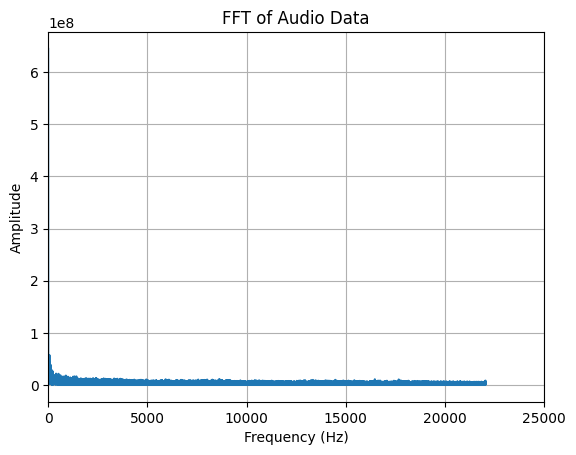

Available MIDI ports: ['Piaggero']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import sounddevice as sd
import datetime
from dataclasses import dataclass, field
import rtmidi
import time

# Helper function to convert frequency to MIDI note
def freq_to_midi(frequency):
    if frequency == 0:
        return None
    return 69 + 12 * np.log2(frequency / 440.0)

@dataclass
class Mel:
    fft_snip: np.ndarray
    fre_snip: np.ndarray

    def plot(self):
        plt.plot(self.fre_snip, np.abs(self.fft_snip))
        plt.title("FFT of Audio Data")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(0, 25000)
        plt.grid(True)
        plt.show()

@dataclass
class Recording:
    name: str
    rate: int = 44100
    duration: int = 10
    channels: int = 1
    dtype: str = 'int16'
    data: np.ndarray = field(default=None, repr=False)
    fft_data: np.ndarray = field(default=None, repr=False)
    freqs: np.ndarray = field(default=None, repr=False)

    def record(self):
        self.data = sd.rec(int(self.duration * self.rate), samplerate=self.rate, channels=self.channels, dtype=self.dtype).flatten()
        sd.wait()

    def compute_fft(self):
        if self.data is None:
            self.record()
        self.fft_data = fft(self.data)
        self.freqs = fftfreq(len(self.fft_data), 1 / self.rate)

    def compute_mel(self, window_size=22050, speed=2):
        if self.data is None:
            self.record()
        mel = []
        step = int(window_size / speed)
        for start in range(0, len(self.data) - window_size + 1, step):
            end = start + window_size
            fft_snip = fft(self.data[start:end])
            freq_snip = fftfreq(len(fft_snip), 1 / self.rate)
            mel.append(Mel(fft_snip, freq_snip))
        return mel

    def plot_freq(self):
        if self.freqs is None or self.fft_data is None:
            self.compute_fft()
        plt.plot(self.freqs[:len(self.freqs) // 2], np.abs(self.fft_data)[:len(self.fft_data) // 2])
        plt.title("FFT of Audio Data")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(0, 25000)
        plt.grid(True)
        plt.show()


class MIDIEvent:
    
    def __init__(self, status: int, note_number: int, velocity: int):
        self.status = int(status)
        self.note_number = int(note_number)
        self.velocity = int(velocity)

    def send(self, midiout):
        """Send MIDI event through the given MIDI output, handling timing."""
        with midiout:
            if self.note_number > 127:
                self.note_number = 127
            midiout.send_message([self.status, self.note_number, 50])

    @classmethod
    def from_freq(cls, frequency, velocity=50):
        midi_note = freq_to_midi(frequency)
        if midi_note is None:
            return None
        return cls(status=144, note_number=midi_note, velocity=velocity)

@dataclass
class AudioProcessor:
    recordings: dict = field(default_factory=dict)

    def record_audio(self, name: str, duration: int):
        recording = Recording(name=name, duration=duration)
        recording.record()
        recording.compute_fft()
        self.recordings[name] = recording

    def generate_midi_events(self, name: str):
        recording = self.recordings.get(name)
        if not recording:
            raise ValueError("Recording not found!")
        mels = recording.compute_mel()
        midi_events = [MIDIEvent.from_freq(np.abs(mel.fft_snip).max(), 50) for mel in mels if MIDIEvent.from_freq(np.abs(mel.fft_snip).max(), 50) is not None]
        return midi_events

    def send_midi(self, name: str, midiout):
        """Send MIDI events for a recording to a given MIDI output."""
        midi_events = self.generate_midi_events(name)
        for event in midi_events:
            if event:
                event.send(midiout)
                time.sleep(0.5)

# Example usage
processor = AudioProcessor()
processor.record_audio("test_1", 2)
recording = processor.recordings["test_1"]
recording.plot_freq()

# Setup MIDI output
midiout = rtmidi.MidiOut()
available_ports = midiout.get_ports()
if available_ports:
    print("Available MIDI ports:", available_ports)
    midiout.open_port(0)  # Change the index based on your setup

# Send MIDI events
processor.send_midi("test_1", midiout)

# Cleanup
del midiout
